# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create list for dataframe and set counters for loop
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


#Save the config info and start query
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : chapais
City not found. Skipping...
Processing Record 2 of Set 1 : mahebourg
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : arraial do cabo
Processing Record 5 of Set 1 : miri
Processing Record 6 of Set 1 : hermanus
Processing Record 7 of Set 1 : albany
Processing Record 8 of Set 1 : ilulissat
Processing Record 9 of Set 1 : banfora
Processing Record 10 of Set 1 : yellowknife
Processing Record 11 of Set 1 : mehamn
Processing Record 12 of Set 1 : mataura
Processing Record 13 of Set 1 : provideniya
Processing Record 14 of Set 1 : barrow
Processing Record 15 of Set 1 : jalu
City not found. Skipping...
Processing Record 16 of Set 1 : busselton
City not found. Skipping...
Processing Record 17 of Set 1 : ushuaia
Processing Record 18 of Set 1 : jamestown
Processing Record 19 of Set 1 : kavaratti
Processing Record 20 of Set 1 : namatanai
City not found. Skipping...
Processing Record 21 

Processing Record 36 of Set 4 : tigzirt
Processing Record 37 of Set 4 : beringovskiy
Processing Record 38 of Set 4 : ribeira grande
Processing Record 39 of Set 4 : namibe
Processing Record 40 of Set 4 : miechow
Processing Record 41 of Set 4 : aksu
Processing Record 42 of Set 4 : alyangula
Processing Record 43 of Set 4 : khomeyn
Processing Record 44 of Set 4 : inuvik
City not found. Skipping...
Processing Record 45 of Set 4 : pisco
Processing Record 46 of Set 4 : sobolevo
Processing Record 47 of Set 4 : shimoda
Processing Record 48 of Set 4 : madera
Processing Record 49 of Set 4 : hay river
Processing Record 50 of Set 4 : upernavik
Processing Record 0 of Set 5 : orange cove
Processing Record 1 of Set 5 : san blas
Processing Record 2 of Set 5 : bac lieu
Processing Record 3 of Set 5 : balabac
Processing Record 4 of Set 5 : oudtshoorn
Processing Record 5 of Set 5 : cockburn town
Processing Record 6 of Set 5 : vestmanna
Processing Record 7 of Set 5 : kavieng
Processing Record 8 of Set 5 : m

Processing Record 20 of Set 8 : makokou
Processing Record 21 of Set 8 : talara
Processing Record 22 of Set 8 : gotsu
Processing Record 23 of Set 8 : mumford
Processing Record 24 of Set 8 : kozan
Processing Record 25 of Set 8 : ippy
Processing Record 26 of Set 8 : mutare
Processing Record 27 of Set 8 : baghdad
Processing Record 28 of Set 8 : aklavik
Processing Record 29 of Set 8 : xinqing
Processing Record 30 of Set 8 : mandalgovi
Processing Record 31 of Set 8 : bairiki
Processing Record 32 of Set 8 : khetia
Processing Record 33 of Set 8 : port-gentil
Processing Record 34 of Set 8 : tombouctou
Processing Record 35 of Set 8 : cayenne
Processing Record 36 of Set 8 : turbat
City not found. Skipping...
Processing Record 37 of Set 8 : mahina
Processing Record 38 of Set 8 : vestmannaeyjar
Processing Record 39 of Set 8 : vila
Processing Record 40 of Set 8 : port-cartier
Processing Record 41 of Set 8 : katangli
Processing Record 42 of Set 8 : maicao
Processing Record 43 of Set 8 : mayo
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

# Save city data into a csv file
weather_df.to_csv("../WeatherPy/cities.csv", index = False)


In [26]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chapais,90,CA,1603376152,97,49.78,-74.85,32.00,8.05
1,Mahébourg,20,MU,1603376153,65,-20.41,57.70,77.00,9.17
2,Rikitea,100,PF,1603376153,77,-23.12,-134.97,73.58,14.61
3,Arraial do Cabo,40,BR,1603376154,65,-22.97,-42.03,78.80,19.46
4,Marabu,40,MY,1603376066,79,4.41,114.01,84.20,6.93


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
# Get the indices of cities that have humidity over 100%.
over_100_df = weather_df[weather_df['Humidity']>100]




In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

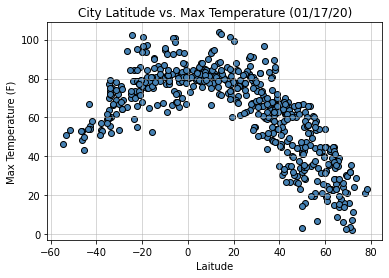

In [36]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"],weather_df ["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("WeatherPy/Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

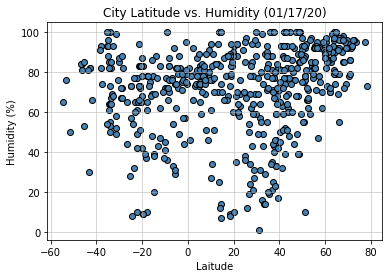

In [35]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

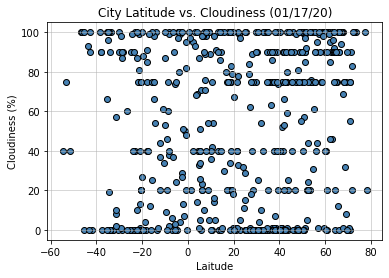

In [37]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

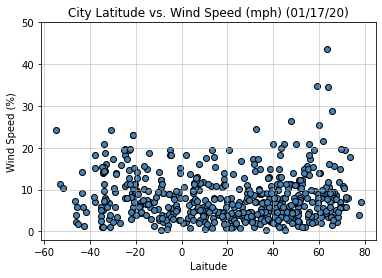

In [38]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_dict["Lat"] < 0]

In [44]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.85


Text(0, 0.5, 'Max Temp (F)')

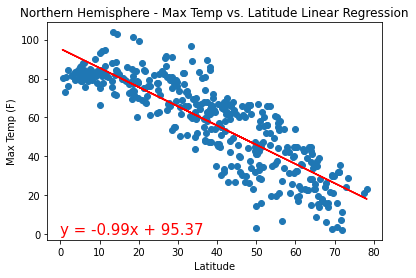

In [45]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.65


Text(0, 0.5, 'Max Temp (F)')

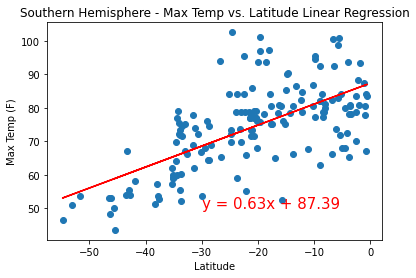

In [46]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.26


Text(0, 0.5, 'Humidity (%)')

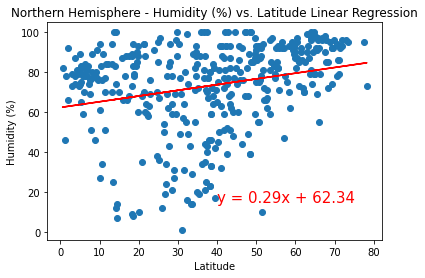

In [47]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.09


Text(0, 0.5, 'Humidity (%)')

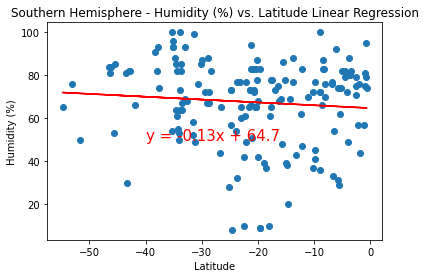

In [48]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.15


Text(0, 0.5, 'Cloudiness (%)')

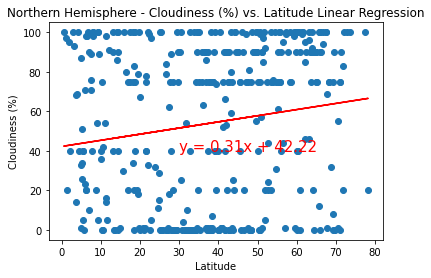

In [49]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0


Text(0, 0.5, 'Cloudiness (%)')

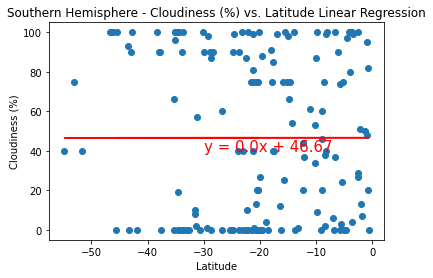

In [50]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.17


Text(0, 0.5, 'Wind Speed (mph)')

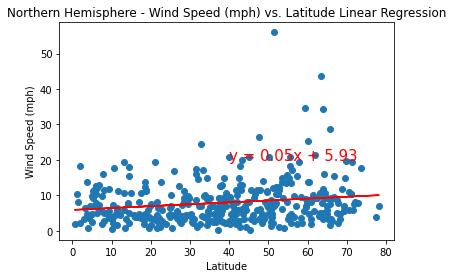

In [51]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.16


Text(0, 0.5, 'Wind Speed (mph)')

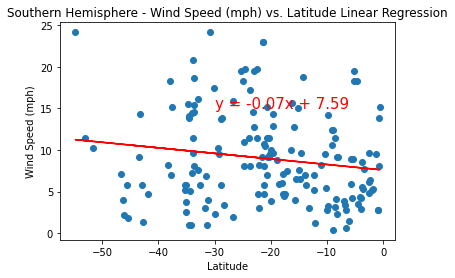

In [52]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")